# Final Project Phase 3 Summary
This Jupyter Notebook (.ipynb) will serve as the skeleton file for your submission for Phase 3 of the Final Project. Complete all sections below as specified in the instructions for the project, covering all necessary details. We will use this to grade your individual code (Do this whether you are in a group or not). Good luck! <br><br>

Note: To edit a Markdown cell, double-click on its text.



## Jupyter Notebook Quick Tips
Here are some quick formatting tips to get you started with Jupyter Notebooks. This is by no means exhaustive, and there are plenty of articles to highlight other things that can be done. We recommend using HTML syntax for Markdown but there is also Markdown syntax that is more streamlined and might be preferable. 
<a href = "https://towardsdatascience.com/markdown-cells-jupyter-notebook-d3bea8416671">Here's an article</a> that goes into more detail. (Double-click on cell to see syntax)

# Heading 1
## Heading 2
### Heading 3
#### Heading 4
<br>
<b>BoldText</b> or <i>ItalicText</i>
<br> <br>
Math Formulas: $x^2 + y^2 = 1$
<br> <br>
Line Breaks are done using br enclosed in < >.
<br><br>
Hyperlinks are done with: <a> https://www.google.com </a> or 
<a href="http://www.google.com">Google</a><br>

# Video Presentation

If you uploaded your Video Presentation to Bluejeans, YouTube, or any other streaming services, please provide the link here:


*   Video Presentation Link


Make sure the video sharing permissions are accessible for anyone with the provided link.

# Data Collection and Cleaning


Transfer/update the data collection and cleaning you created for Phase II below. You may include additional cleaning functions if you have extra datasets. If no changes are necessary, simply copy and paste your phase II parsing/cleaning functions.



## Downloaded Dataset Requirement



In [62]:
import json
import requests
import pprint
import re
import pandas as pd
from bs4 import BeautifulSoup
import pycountry
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
def data_parser():
  df = pd.read_csv("unfiltered_oecd_data.csv")
  disposable_income = data_select(df, "1_1")
  disposable_income = cleaning_sub_table(disposable_income, "Disposable_Income")
  disposable_income.to_csv("disposable_income.csv", index = False)
  pprint.pprint(disposable_income)

def data_select(df, data_category):
  df = df.loc[(df["MEASURE"] == data_category) & (df["AGE"] == "_T") & (df["SEX"]=="_T") &(df["EDUCATION_LEV"]=="_T"),["REF_AREA", "UNIT_MEASURE", "TIME_PERIOD", "OBS_VALUE", "OBS_STATUS", "DECIMALS", "BASE_PER"]] 
  return df

def cleaning_sub_table(data, measure):
    data = data.loc[:, ["REF_AREA","TIME_PERIOD", "OBS_VALUE"]]
    data = data.reset_index(drop=True)
    data = data.rename(columns= {"OBS_VALUE":measure, "REF_AREA":"Country", "TIME_PERIOD": "Year"})
    return data



############ Function Call ############
data_parser()

    Country  Year  Disposable_Income
0       DEU  2004            36965.0
1       DEU  2005            37285.0
2       DEU  2006            37745.0
3       DEU  2007            37893.0
4       DEU  2008            38311.0
..      ...   ...                ...
607     SWE  2018            38632.0
608     SWE  2019            38821.0
609     SWE  2020            38166.0
610     SWE  2021            39404.0
611     SWE  2022            39048.0

[612 rows x 3 columns]


## Web Collection Requirement \#1


In [9]:
def web_parser1():
    url = 'https://en.wikipedia.org/wiki/List_of_countries_by_Human_Development_Index'
    df = collect_data(url)
    cleaned_df = clean_data(df)
    export_data(cleaned_df)


# Function to collect table data
def collect_data(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    tables = soup.find_all("table", {"class": "wikitable"})
    second_table = tables[1]

    header_cells = second_table.find_all("th")
    headers = [header_cells[i].text.strip() for i in range(min(5, len(header_cells)))]


    rows = []
    for row in second_table.find_all("tr"):
        cells = row.find_all(["th", "td"])  
        cell_data = [cell.get_text(strip=True) for cell in cells]
        if len(cell_data) >= 5 and cell_data[0] != "Rank":
            rows.append(cell_data)
            
    df = pd.DataFrame(rows, columns=headers)
    return df

def clean_data(df):
    df = df.drop(columns=["Δ"], axis=1)

    percent_columns = df.columns[df.columns.str.contains("%")]
    
    for col in percent_columns:
        df[col] = df[col].replace({"%": "", r"NA\[[a-c]\]": "0"}, regex=True)
        df[col] = df[col].astype(float) / 100
    return df
def export_data(df):
    df.to_csv("HDI_cleaned.csv", index=False)
    pprint.pprint(df)


############ Function Call ############
web_parser1()

    Rank      Country or territory HDI value  %annual growth(2010–2022)
0      1               Switzerland     0.967                     0.0024
1      2                    Norway     0.966                     0.0025
2      3                   Iceland     0.959                     0.0028
3      4                 Hong Kong     0.956                     0.0038
4      5                   Denmark     0.952                     0.0035
..   ...                       ...       ...                        ...
161  188                      Mali     0.410                     0.0008
162  189                     Niger     0.394                     0.0134
163  191  Central African Republic     0.387                     0.0067
164  192               South Sudan     0.381                     0.0053
165  193                   Somalia     0.380                     0.0000

[166 rows x 4 columns]


## Web Collection Requirement #2

In [11]:
def web_parser2():
  urls = ["https://stats.bis.org/api/v2/data/dataflow/BIS/WS_CBTA/1.0/M.AE+AR+AT+AU+BE+BR+CA+CH+CL+CN+CZ+DE+DK+EE+ES+FI+FR+GB+GR+HK+HR+HU+ID+IE+IL+IN+IT+JP+KR+LT+LU+LV+MK+MX+MY+NL+NO+NZ+PE+PH+PL+PT+SA+SE+SG+SI+SK+TH+TR+US+XM+ZA..USD?startPeriod=2000-01-01&endPeriod=2024-10-01&format=sdmx-json",
        "https://stats.bis.org/api/v2/data/dataflow/BIS/WS_CBTA/1.0/M.US..XDC..B?startPeriod=2000-01-01&endPeriod=2024-10-01&format=sdmx-json"]

  data = [json.loads(requests.get(url).content) for url in urls]
  country_abbv = get_country_abbv(data)
  country_list = get_countries(country_abbv)
  total_asset_dict = get_total_asset(data, country_list)
  df = match_total_asset_date(total_asset_dict)
  df = clean_null(df)
  df.to_csv('total_assets_monthly.csv', index=False)
  #pprint.pprint(df)
  return df
  
def get_country_abbv(data):
  country_abbv = []
  for i, val in enumerate(data):
    for item in data[i]["data"]["structure"]["dimensions"]["series"][1]['values']:
        country_abbv.append(item)
  return country_abbv

def get_countries(country_abbv):
  country_list = []
  for item in country_abbv: 
      country_list.append(item["id"])
  return country_list

def get_total_asset(data, country_list):
  new_list = []
  for i, val in enumerate(data):
      for key, value in data[i]["data"]["dataSets"][0]["series"].items():
          alist = []
          for k, val in value["observations"].items():
              alist.append(val[0])
          new_list.append(alist)
  total_asset_dict = dict(zip(country_list, new_list))
  return total_asset_dict

def match_total_asset_date(total_asset_dict):
  dates = pd.date_range(start="2000-01", end="2024-10", freq='MS') 
  rows = []
  for country, values in total_asset_dict.items():
      for date, value in zip(dates, values):
          rows.append({'Country': country, 'Date': date.strftime("%Y-%m"), 'Total Asset': round(float(value), 2)})

  df = pd.DataFrame(rows)
  return df

def clean_null(df):
  df[df.isnull().any(axis=1)]
  df = df.dropna()
  return df

        
############ Function Call ############
web_parser2()

Country     Date  Total Asset
0          NZ  2000-01         4.80
1          NZ  2000-02         4.21
2          NZ  2000-03         4.94
3          NZ  2000-04         5.05
4          NZ  2000-05         5.12
...       ...      ...          ...
14963      US  2024-06      7231.16
14964      US  2024-07      7178.39
14965      US  2024-08      7123.24
14966      US  2024-09      7080.06
14967      US  2024-10      7013.49

[14957 rows x 3 columns]

## Additional Dataset Parsing/Cleaning Functions

Write any supplemental (optional) functions here.

In [13]:
def extra_source1():
  urls = ["https://stats.bis.org/api/v2/data/dataflow/BIS/WS_CBPOL/1.0/M.AR+AU+BR+CA+CH+CL+CN+CO+CZ+DK+GB+HK+HR+HU+ID+IL+IN+IS+JP+KR+MA+MK+MX+MY+NO+NZ+PE+PH+PL+RO+RS+RU+SA+SE+TH+TR+US+XM+ZA?startPeriod=2000-01-01&endPeriod=2024-10-01&format=sdmx-json"]
  data = [json.loads(requests.get(url).content) for url in urls]
  country_abbv = get_country_abbv(data)
  country_list = get_countries(country_abbv)
  interest_rate_dict = get_interest_rate(data, country_list)
  df = match_interest_rate_date(interest_rate_dict)
  df = clean_null(df)
  df.to_csv('interest_rate_monthly.csv', index=False)
  #pprint.pprint(df)
  return df
  
def get_country_abbv(data):
  country_abbv = []
  for i, val in enumerate(data):
    for item in data[i]["data"]["structure"]["dimensions"]["series"][1]['values']:
        country_abbv.append(item)
  return country_abbv

def get_countries(country_abbv):
  country_list = []
  for item in country_abbv: 
      country_list.append(item["id"])
  return country_list

def get_interest_rate(data, country_list):
  new_list = []
  for i, val in enumerate(data):
      for key, value in data[i]["data"]["dataSets"][0]["series"].items():
          alist = []
          for k, val in value["observations"].items():
              alist.append(val[0])
          new_list.append(alist)
  interest_rate_dict = dict(zip(country_list, new_list))
  return interest_rate_dict

def match_interest_rate_date(nterest_rate_dict):
  dates = pd.date_range(start="2000-01", end="2024-10", freq='MS') 
  rows = []
  for country, values in nterest_rate_dict.items():
      for date, value in zip(dates, values):
          rows.append({'Country': country, 'Date': date.strftime("%Y-%m"), 'Interest Rate': round(float(value), 3)})

  df = pd.DataFrame(rows)
  return df

def clean_null(df):
  df[df.isnull().any(axis=1)]
  df = df.dropna()
  return df
    
############ Function Call ############
extra_source1()

Country     Date  Interest Rate
0          RU  2000-01          45.00
1          RU  2000-02          45.00
2          RU  2000-03          33.00
3          RU  2000-04          33.00
4          RU  2000-05          33.00
...       ...      ...            ...
11300      MX  2024-06          11.00
11301      MX  2024-07          11.00
11302      MX  2024-08          10.75
11303      MX  2024-09          10.50
11304      MX  2024-10          10.50

[11252 rows x 3 columns]

#Inconsistency Revisions
 **If you were requested to revise your inconsistency section from Phase II, enter your responses here. Otherwise, ignore this section.**

For each inconsistency (NaN, null, duplicate values, empty strings, etc.) you discover in your datasets, write at least 2 sentences stating the significance, how you identified it, and how you handled it.

1. IGNORED

2. IGNORED

3. IGNORED

4. (if applicable)

5. (if applicable)


## Data Sources
Include sources (as links) to your datasets. Add any additional data sources if needed. Clearly indicate if a data source is different from one submitted in your Phase I, as we will check that it satisfies the requirements.
*   Downloaded Dataset Source: https://data-explorer.oecd.org/vis?tm=wealth&pg=0&snb=160&df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_HSL%40DF_HSL_CWB&df[ag]=OECD.WISE.WDP&df[vs]=1.0&dq=..._T._T._T.&pd=2004%2C2024&to[TIME_PERIOD]=false
*   Web Collection #1 Source (DIFFERENT FROM ONE SUBMITTED IN PHASE 1): https://en.wikipedia.org/wiki/List_of_countries_by_Human_Development_Index#cite_note-olddata-19
*   Web Collection #2 Source(JSON API): https://stats.bis.org/api/v2/data/dataflow/BIS/WS_CBPOL/1.0/M.AR+AU+BR+CA+CH+CL+CN+CO+CZ+DK+GB+HK+HR+HU+ID+IL+IN+IS+JP+KR+MA+MK+MX+MY+NO+NZ+PE+PH+PL+RO+RS+RU+SA+SE+TH+TR+US+XM+ZA?startPeriod=1990-01-01&endPeriod=2024-10-31&format=sdmx-json
*   Web Collection #3 Source(JSON API): https://stats.bis.org/api/v2/data/dataflow/BIS/WS_CBTA/1.0/M.AE+AR+AT+AU+BE+BR+CA+CH+CL+CN+CZ+DE+DK+EE+ES+FI+FR+GB+GR+HK+HR+HU+ID+IE+IL+IN+IT+JP+KR+LT+LU+LV+MK+MX+MY+NL+NO+NZ+PE+PH+PL+PT+SA+SE+SG+SI+SK+TH+TR+US+XM+ZA..USD?startPeriod=1990-01-01&endPeriod=2024-10-30&format=sdmx-json , https://stats.bis.org/api/v2/data/dataflow/BIS/WS_CBTA/1.0/M.US..XDC..B?startPeriod=1990-01-01&endPeriod=2024-10-31&format=sdmx-json




# Data Analysis
For the Data Analysis section, you are required to utilize your data to complete the following:

*   Create at least 5 insights
*   Generate at least 3 data visualizations

Create a function for each of the following sections mentioned above. Do not forget to fill out the explanation section for each function. 

Make sure your data analysis is not too simple. Performing complex aggregation and using modules not taught in class shows effort, which will increase the chance of receiving full credit. 

# Topic Summary

Please provide a brief executive summary (5 sentences or less) discussing your topic:

## Insights

In [42]:
def insight1():
    df = web_parser2()
    df["Growth"] = df.groupby('Country')['Total Asset'].pct_change() * 100
    average_growth = df.groupby('Country')['Growth'].mean()
    sorted_correlations = average_growth.sort_values(ascending=False)
    top_5_total_asset_growth = sorted_correlations.head(5)
    top_5_total_asset_decrease = sorted_correlations.tail(5).sort_values()
    print("Top 5 Most Grown Total Asset:")
    for country, value in top_5_total_asset_growth.items():
        if country == 'XM': country = 'Euro Area'
        print(f"{country}: {value:.3f}% Monthly")

    print("\nTop 5 Least Grown Total Asset:")
    for country, value in top_5_total_asset_decrease.items():
        if country == 'XM': country = 'Euro Area'
        print(f"{country}: {value:.3f}% Monthly")




############ Function Call ############
insight1()

Top 5 Most Grown Total Asset:
FI: 1.526% Monthly
GB: 1.509% Monthly
EE: 1.414% Monthly
LU: 1.233% Monthly
AE: 1.185% Monthly

Top 5 Least Grown Total Asset:
CL: 0.408% Monthly
MY: 0.492% Monthly
HU: 0.509% Monthly
HK: 0.509% Monthly
KR: 0.536% Monthly


### Insight 1 Explanation

Insert explanation here

In [40]:
def msd_similarity(df):
  countries = df.columns
  n = len(countries)
  similarity_matrix = pd.DataFrame(np.zeros((n, n)), index=countries, columns=countries)
    
  for i, country1 in enumerate(countries):
    for j, country2 in enumerate(countries):
      if i < j: 
        differences = df[country1] - df[country2]
        mean_square_diff = np.nanmean(differences ** 2)  
        similarity_matrix.loc[country1, country2] = 1 / (1 + mean_square_diff)  
  #print(similarity_matrix)
  return similarity_matrix

def insight2():
  df = extra_source1()
  wide_df = df.pivot(index="Date", columns="Country", values="Interest Rate")

  msd_matrix = msd_similarity(wide_df)

  
  upper_triangle = np.triu(np.ones(msd_matrix.shape), k=1).astype(bool)
  up_tr_msd = msd_matrix.where(upper_triangle)
  
  flattened = up_tr_msd.unstack()
  flattened = flattened.dropna()
  sorted_msd = flattened.sort_values(ascending=False)

  top_5_similar = sorted_msd.head(5)

  top_5_dissimilar = sorted_msd.tail(5).sort_values()

  print("Top 5 Most Similar Countries (MSD):")
  for index, value in top_5_similar.items():
      item0 = index[0]
      item1 = index[1]
      if item0 == 'XM': item0 = 'Euro Area'
      if item1 == 'XM': item1 = 'Euro Area'
      print(f"{item0} - {item1}: {value:.5f}")

  print("\nTop 5 Least Similar Countries (MSD):")
  for index, value in top_5_dissimilar.items():
      item0 = index[0]
      item1 = index[1]
      if item0 == 'XM': item0 = 'Euro Area'
      if item1 == 'XM': item1 = 'Euro Area'
      print(f"{item0} - {item1}: {value:.5f}")



############ Function Call ############
insight2()

Top 5 Most Similar Countries (MSD):
Euro Area - SE: 0.80138
Euro Area - DK: 0.75221
SE - DK: 0.65604
US - CA: 0.63874
MA - KR: 0.58267

Top 5 Least Similar Countries (MSD):
CH - AR: 0.00042
DK - AR: 0.00042
TH - AR: 0.00043
SE - AR: 0.00043
Euro Area - AR: 0.00043


### Insight 2 Explanation

Insert explanation here

In [44]:
import pycountry

def insight3():
    hdi_df = pd.read_csv("HDI_cleaned.csv")
    disposable_income_df = pd.read_csv("disposable_income.csv")

    disposable_income_df = disposable_income_df[(disposable_income_df['Year'] >= 2010) & (disposable_income_df['Year'] <= 2022)]
    avg_disposable_income_df = disposable_income_df.groupby("Country", as_index=False)['Disposable_Income'].mean()
    avg_disposable_income_df.rename(columns={"Disposable_Income": "Avg_Disposable_Income"}, inplace=True)

    hdi_df["Country_Code"] = hdi_df["Country or territory"].apply(get_country_code)

    merged_df = pd.merge(hdi_df, avg_disposable_income_df, left_on="Country_Code", right_on="Country", how="inner")
    correlation = merged_df["HDI value"].corr(merged_df["Avg_Disposable_Income"])
    
    print(f"Correlation between HDI and Average Disposable Income (2010–2022): {correlation:.4f}")

def get_country_code(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except LookupError:
        return None

############ Function Call ############
insight3()


Correlation between HDI and Average Disposable Income (2010–2022): 0.7702


### Insight 3 Explanation

Insert explanation here

In [47]:
def insight4():
    hdi_df = pd.read_csv("HDI_cleaned.csv")
    sorted_hdi_desc = hdi_df.sort_values(by="%annual growth(2010–2022)", ascending=False)
    
    sorted_hdi_asc = hdi_df.sort_values(by="%annual growth(2010–2022)", ascending=True)
    
    top_5_hdi = sorted_hdi_desc.head(5)
    print("Top 5 Countries by HDI Annual Growth:")
    print(top_5_hdi.to_string(index=False))
    
    bottom_5_hdi = sorted_hdi_asc.head(5)
    print("\nBottom 5 Countries by HDI Annual Growth:")
    print(bottom_5_hdi.to_string(index=False))


############ Function Call ############
insight4()


Top 5 Countries by HDI Annual Growth:
 Rank Country or territory  HDI value  %annual growth(2010–2022)
  122                Nauru      0.696                     0.0184
  158                Haiti      0.552                     0.0174
  142             Eswatini      0.610                     0.0170
  171             Djibouti      0.515                     0.0167
  176             Ethiopia      0.492                     0.0155

Bottom 5 Countries by HDI Annual Growth:
 Rank Country or territory  HDI value  %annual growth(2010–2022)
  193              Somalia      0.380                     0.0000
  102     Marshall Islands      0.731                     0.0000
  116                Samoa      0.702                     0.0002
  115              Jamaica      0.706                     0.0006
   97             Dominica      0.740                     0.0006


### Insight 4 Explanation

Insert explanation here

In [64]:
def insight5():
    df = pd.read_csv("disposable_income.csv")

    avg_income_per_country = df.groupby("Country", as_index=False)["Disposable_Income"].mean()
    avg_income_per_country.rename(columns={"Disposable_Income": "Average_Disposable_Income"}, inplace=True)
    
    max = avg_income_per_country["Average_Disposable_Income"].max()
    min = avg_income_per_country["Average_Disposable_Income"].min()
    median = avg_income_per_country["Average_Disposable_Income"].median()
    mean = avg_income_per_country["Average_Disposable_Income"].mean()
    q1 = avg_income_per_country["Average_Disposable_Income"].quantile(0.25)
    q3 = avg_income_per_country["Average_Disposable_Income"].quantile(0.75)
    iqr = q3 - q1 

    print("Spread of Data for Average Disposable Income:")
    print(f"Max: {max}")
    print(f"Min: {min}")
    print(f"Median: {median}")
    print(f"Mean: {mean}")
    print(f"Q1 (25th percentile): {q1}")
    print(f"Q3 (75th percentile): {q3}")
    print(f"IQR (Interquartile Range): {iqr}")

    
############ Function Call ############
insight5()

Spread of Data for Average Disposable Income:
Max: 49462.94736842105
Min: 15688.125
Median: 29803.315789473683
Mean: 31281.995485036117
Q1 (25th percentile): 24531.842105263157
Q3 (75th percentile): 37978.89473684211
IQR (Interquartile Range): 13447.05263157895


### Insight 5 Explanation

Insert explanation here

## Data Visualizations

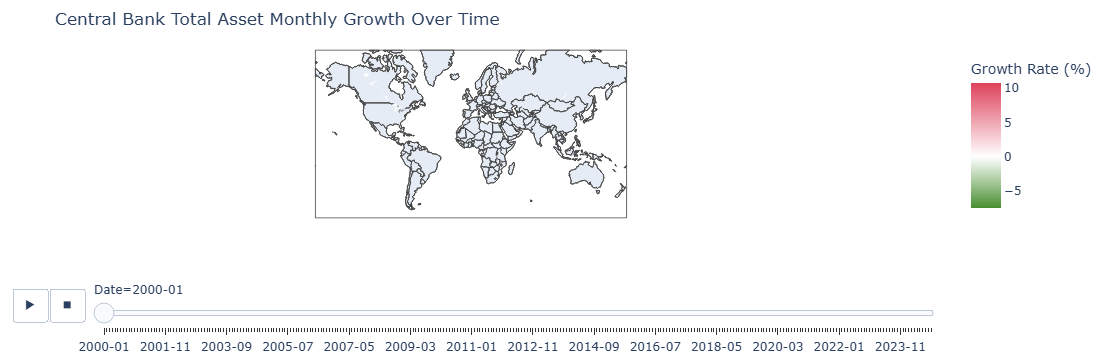

In [68]:
def map_country_code(alpha_2_code):
    try:
        
        return pycountry.countries.get(alpha_2=alpha_2_code).alpha_3
    except AttributeError:
        
        return alpha_2_code
      
def visual1():
  df = web_parser2()
  df["Growth"] = df.groupby('Country')['Total Asset'].pct_change() * 100
  df['Country'] = df['Country'].apply(map_country_code)
  df['Country'] = df['Country'].apply(map_country_code)
  euro_area_countries = ['AUT', 'BEL', 'CYP', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX', 'MLT', 'NLD', 'PRT', 'SVK', 'SVN', 'ESP']
  euro_data = df[df['Country'] == 'XM'].copy()
  for country_code in euro_area_countries:
    country_data = euro_data.copy()  
    country_data['Country'] = country_code  
    df = pd.concat([df, country_data]) 
  low_3percent = df['Growth'].quantile(0.03)  
  high_3percent = df['Growth'].quantile(0.97)
  fig = px.choropleth(
      df, 
      locations="Country",  
      color="Growth",       
      hover_name="Country", 
      hover_data={"Total Asset": True},
      animation_frame="Date", 
      projection='mercator',
      color_continuous_scale=[
          [0, "#488f31"],     
          [(-low_3percent / (high_3percent + abs(low_3percent))), "white"],
          [1, "#de425b"]       
      ],
      title="Central Bank Total Asset Monthly Growth Over Time",
      range_color=[low_3percent, high_3percent],
      labels={"Growth": "Growth Rate (%)"} 
  )
  fig.update_geos(projection_scale=1,  
                  center={"lat": 20, "lon": 0},  
                  showcountries=True, showcoastlines=True,
                  lataxis_range=[-10, 90])  

  fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})

  fig.show()



############ Function Call ############
visual1()

### Visualization 1 Explanation

Insert explanation here

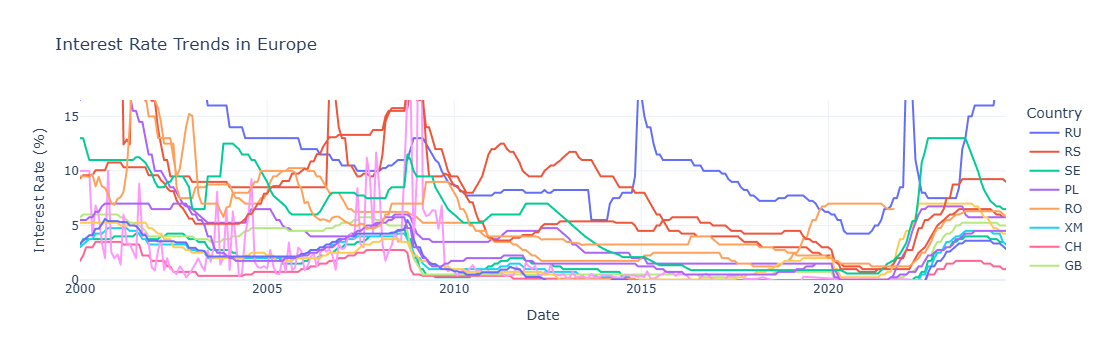

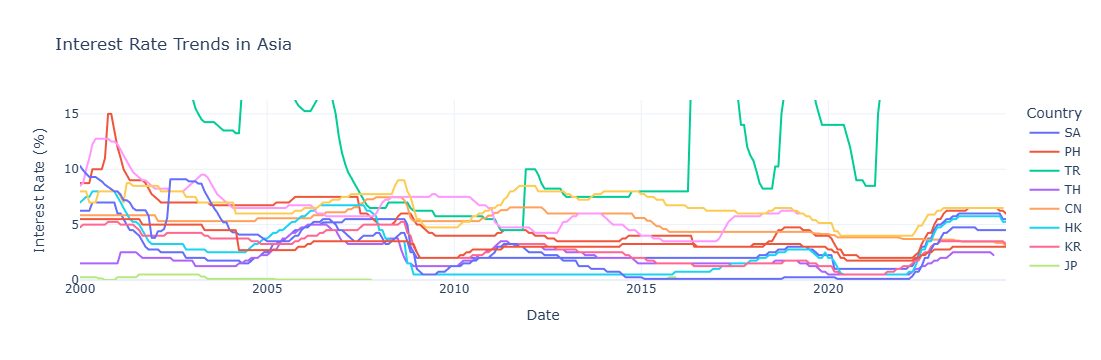

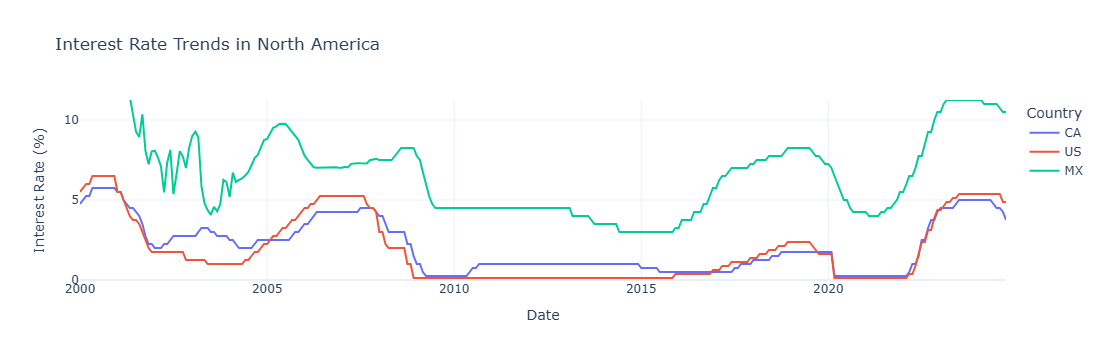

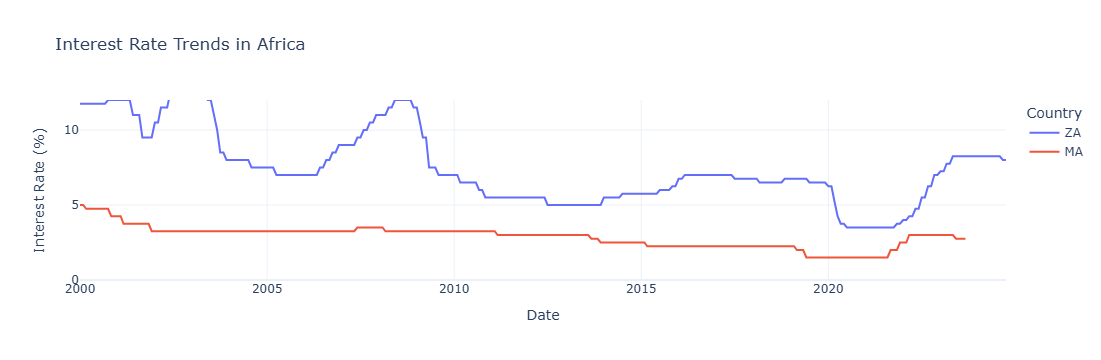

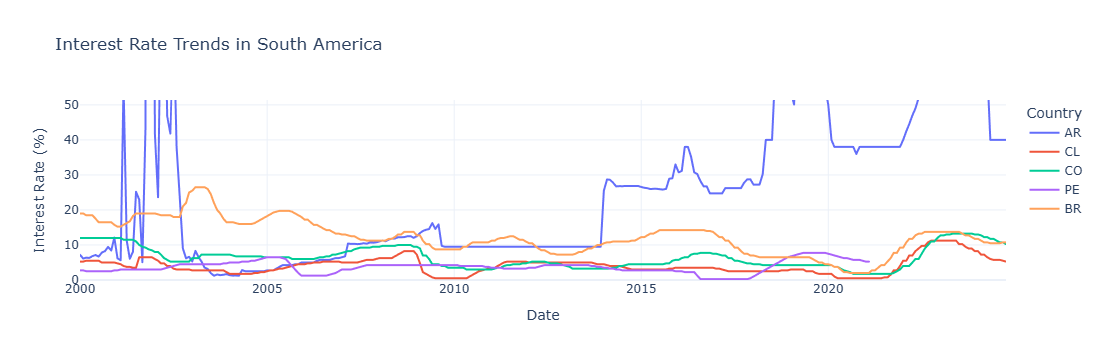

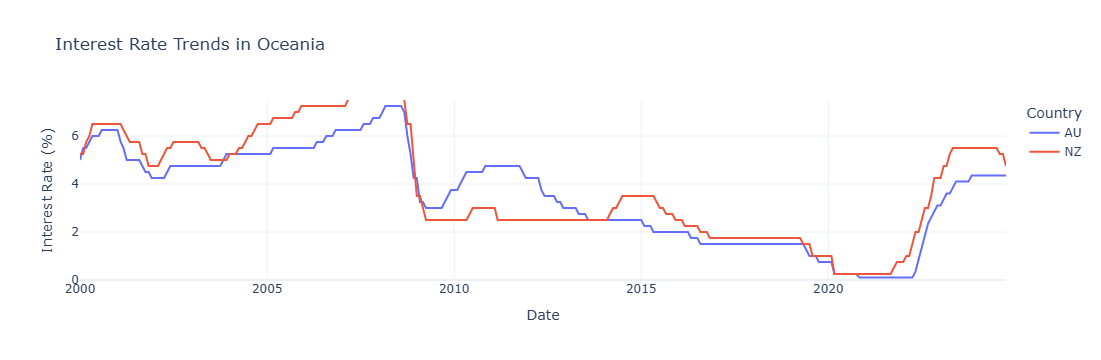

In [70]:
def visual2():
    df = extra_source1()
    #making line graph 
    continent_mapping= {
    'AU': 'Oceania', 'PH': 'Asia', 'TH': 'Asia', 'US': 'North America',
    'CN': 'Asia', 'DE': 'Europe', 'FR': 'Europe', 'BR': 'South America', 
    'ZA': 'Africa', 'IN': 'Asia', 'JP': 'Asia', 'CA': 'North America', 
    'MX': 'North America', 'GB': 'Europe', 'IT': 'Europe', 'RU': 'Europe',
    'XM': 'Europe', 'SE': 'Europe', 'CL': 'South America', 'TR': 'Asia', 'AR': 'South America',
    'HU': 'Europe', 'MY': 'Asia', 'PE':'South America', 'ID':"Asia", 'CH': 'Europe', 
    'DK':'Europe', 'KR': 'Asia', 
    'IL': 'Asia',           # Israel
    'NZ': 'Oceania',        # New Zealand
    'CZ': 'Europe',         # Czech Republic
    'PL': 'Europe',         # Poland
    'HK': 'Asia',           # Hong Kong
    'SA': 'Asia',           # Saudi Arabia
    'NO': 'Europe',         # Norway
    'MK': 'Europe',         # North Macedonia
    'HR': 'Europe',         # Croatia
    'TH': 'Asia',           # Thailand
    'RS': 'Europe',  # Serbia
    'RO': 'Europe',  # Romania
    'CO': 'South America',  # Colombia
    'IS': 'Europe',  # Iceland
    'MA': 'Africa'   # Morocco
    }

    df['Continent'] = df['Country'].map(continent_mapping)
    continents = df['Continent'].unique()
    for continent in continents:

        continent_df = df[df['Continent'] == continent]
        top_3_percent = continent_df['Interest Rate'].quantile(0.97)
        fig = px.line(
                continent_df, 
                x='Date', 
                y='Interest Rate', 
                color='Country',
                title=f'Interest Rate Trends in {continent}',
                labels={'Interest Rate': 'Interest Rate (%)'}
        )
            

        fig.update_layout(
                xaxis_title='Date',
                yaxis_title='Interest Rate (%)',
                legend_title='Country',
                template='plotly_white',
                yaxis=dict(range=[0, top_3_percent])
        )
            
    
        fig.show()
############ Function Call ############
visual2()
##I did it

### Visualization 2 Explanation

Insert explanation here

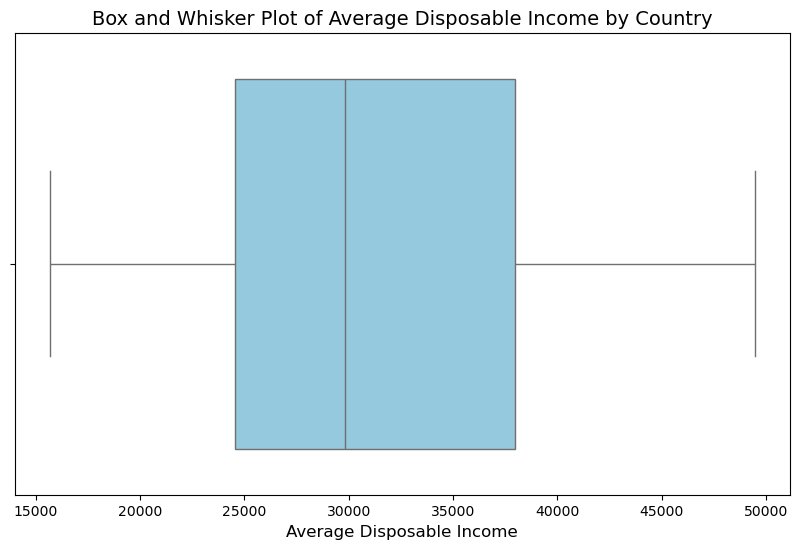

In [72]:
def visual3():
    df = pd.read_csv("disposable_income.csv")
    
    avg_income_per_country = df.groupby("Country", as_index=False)["Disposable_Income"].mean()
    avg_income_per_country.rename(columns={"Disposable_Income": "Average_Disposable_Income"}, inplace=True)
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=avg_income_per_country["Average_Disposable_Income"], color="skyblue")
    
    plt.xlabel("Average Disposable Income", fontsize=12)
    plt.title("Box and Whisker Plot of Average Disposable Income by Country", fontsize=14)
    
    plt.show()

############ Function Call ############
visual3()


### Visualization 3 Explanation

Insert explanation here

# Cited Sources

If you used any additional sources to complete your Data Analysis section, list them here:


*   Example Module Documentation
*   Example Stack Overflow Assistance



# Graphical User Interface (GUI) Implementation
If you decide to create a GUI for Phase II, please create a separate Python file (.py) to build your GUI. You must submit both the completed PhaseII.ipynb and your Python GUI file.

# Submission

Prior to submitting your notebook to Gradescope, be sure to <b>run all functions within this file</b>. We will not run your functions ourselves, so we must see your outputs within this file in order to receive full credit.
